In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")
pd.set_option('display.max_columns', 100)
plt.rcParams['font.size'] = 10

### Inspection

In [2]:
gender_df = pd.read_csv("gender_submission.csv")

In [3]:
gender_df

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [4]:
test_df = pd.read_csv("test.csv")

In [5]:
test_df.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1  47.0      1      0     363272   7.0000   NaN        S  
2  62.0      0      0     240276   9.6875   NaN        Q  
3  27.0      0      0     315154   8.6625   NaN        S  
4  22.0      1      1    3101298  12.2875   NaN        S  
5  14.0      0      0       7538   9.2250   NaN        S  
6  30.0      0      0     330972   7.6292   NaN        Q  
7  26.0      1      1     248738  29.0000   NaN        S  
8  18.0      0      0       2657   7.2292   NaN        C  
9  21.0      2      0  A/4 48871  24.1500   NaN        S

In [6]:
train_df = pd.read_csv("train (3).csv")

In [7]:
train_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [9]:
test_df.isna().sum()
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
cat_cols = test_df.select_dtypes("object").columns.tolist()
num_cols = test_df.select_dtypes(np.number).columns.tolist()

### Checking for missing values

In [11]:
train_df[cat_cols].isna().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [12]:
test_df[cat_cols].isna().sum()

Name          0
Sex           0
Ticket        0
Cabin       327
Embarked      0
dtype: int64

In [13]:
train_df[num_cols].isna().sum()

PassengerId      0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [14]:
test_df[num_cols].isna().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

### Filling in categorical variables with missing values i.e. for Embarked and Cabin

In [15]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train_df['Embarked'] = train_df['Embarked'].fillna("Unknown")

In [17]:
train_df['Cabin'] = train_df['Cabin'].fillna("Unknown")

In [18]:
test_df['Cabin'] = test_df['Cabin'].fillna("Unknown")

### Filling in numerical variables with missing values i.e. for Age

## Missing data is also a data
#### Preserving the missing values

In [19]:
train_map = {False: 0, True: 1}
train_df['Missing_age'] = train_df['Age'].isna().map(train_map)

In [20]:
test_df['Missing_age'] = test_df['Age'].isna().map(train_map)

In [21]:
train_df.tail(2)

PassengerId  Survived  Pclass                   Name   Sex   Age  SibSp  \
889          890         1       1  Behr, Mr. Karl Howell  male  26.0      0   
890          891         0       3    Dooley, Mr. Patrick  male  32.0      0   

     Parch  Ticket   Fare    Cabin Embarked  Missing_age  
889      0  111369  30.00     C148        C            0  
890      0  370376   7.75  Unknown        Q            0

In [22]:
train_df['Age'].isna().sum()

177

In [23]:
train_df['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [24]:
def insert_social_stats(df):
    import re
    import warnings

    warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
    social_status = ["Mr", "Mrs", "Miss", "Master", "Dr"]
    df["Social_status"] = "Others"
    for i in range(0, len(df)):
        if re.search(r"\bMr\b\.", df["Name"][i]):

            df["Social_status"][i] = "Mr"

        elif re.search(r"\bMrs\b\.", df["Name"][i]):

            df["Social_status"][i] = "Mrs"

        elif re.search(r"\bMiss\b\.", df["Name"][i]):

            df["Social_status"][i] = "Miss"

        elif re.search(r"\bMaster\b\.", train_df["Name"][i]):

            df["Social_status"][i] = "Master"

        elif re.search(r"\bDr\b\.", df["Name"][i]):

            df["Social_status"][i] = "Dr"

        else:
            df["Social_status"][i] = "Others"
    warnings.resetwarnings()

In [25]:
insert_social_stats(train_df)

In [26]:
insert_social_stats(test_df)

In [27]:
train_df["Social_status"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     20
Dr          7
Name: Social_status, dtype: int64

In [28]:
test_df["Social_status"].value_counts()

Mr        240
Miss       78
Mrs        72
Others     26
Master      1
Dr          1
Name: Social_status, dtype: int64

In [29]:
train_df[num_cols].nunique()

PassengerId    891
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

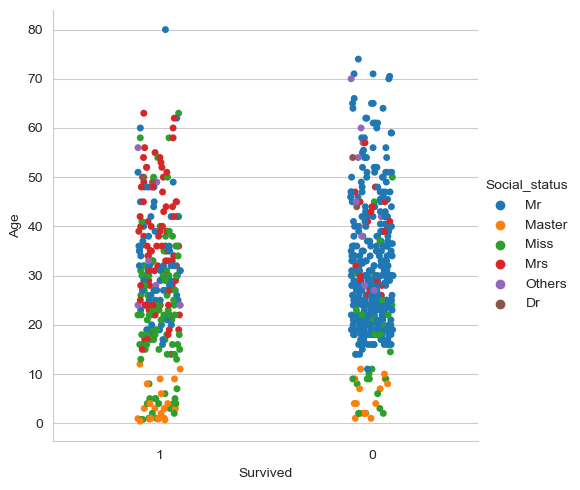

In [30]:
sns.catplot(
    x="Survived",
    y="Age",
    hue="Social_status",
    data=train_df,
    kind="strip",
    jitter=True,
    order=[1, 0],
)

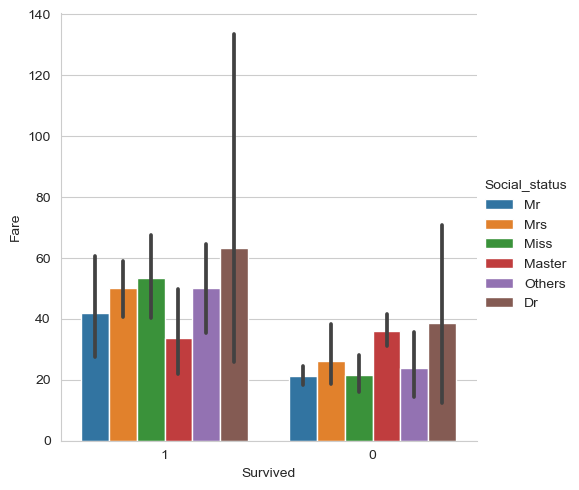

In [31]:
sns.catplot(
    x="Survived",
    y="Fare",
    hue="Social_status",
    data=train_df,
    kind="bar",
    order=[1, 0],
)

In [32]:
train_df[train_df['Age'].isna()].head(10)

PassengerId  Survived  Pclass  \
5             6         0       3   
17           18         1       2   
19           20         1       3   
26           27         0       3   
28           29         1       3   
29           30         0       3   
31           32         1       1   
32           33         1       3   
36           37         1       3   
42           43         0       3   

                                              Name     Sex  Age  SibSp  Parch  \
5                                 Moran, Mr. James    male  NaN      0      0   
17                    Williams, Mr. Charles Eugene    male  NaN      0      0   
19                         Masselmani, Mrs. Fatima  female  NaN      0      0   
26                         Emir, Mr. Farred Chehab    male  NaN      0      0   
28                   O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0      0   
29                             Todoroff, Mr. Lalio    male  NaN      0      0   
31  Spencer, Mrs. William Augustus (Marie Eugenie)  female  NaN      1      0   
32                        Glynn, Miss. Mary Agatha  female  NaN      0      0   
36                                Mamee, Mr. Hanna    male  NaN      0      0   
42                             Kraeff, Mr. Theodor    male  NaN      0      0   

      Ticket      Fare    Cabin Embarked  Missing_age Social_status  
5     330877    8.4583  Unknown        Q            1            Mr  
17    244373   13.0000  Unknown        S            1            Mr  
19      2649    7.2250  Unknown        C            1           Mrs  
26      2631    7.2250  Unknown        C            1            Mr  
28    330959    7.8792  Unknown        Q            1          Miss  
29    349216    7.8958  Unknown        S            1            Mr  
31  PC 17569  146.5208      B78        C            1           Mrs  
32    335677    7.7500  Unknown        Q            1          Miss  
36      2677    7.2292  Unknown        C            1            Mr  
42    349253    7.8958  Unknown        C            1            Mr

#### Filling in Missed Ages based on their social status

In [33]:
import math
def provide_age_based_on_social_stats(df): 
    missing_ = df['Age'].isna()
    not_missing = df[~df['Age'].isna()]
    _for_mr = not_missing[not_missing["Social_status"] == "Mr"]
    _for_mrs = not_missing[not_missing["Social_status"] == "Mrs"]
    _for_miss = not_missing[not_missing["Social_status"] == "Miss"]
    _for_master = not_missing[not_missing["Social_status"] == "Master"]
    _for_dr = not_missing[not_missing["Social_status"] == "Dr"]
    _for_others = not_missing[not_missing["Social_status"] == "Others"]
    
    missing_df = df[missing_]
    # Missing ages based on their social status
    missing_for_mr = missing_df[missing_df["Social_status"] == "Mr"]
    missing_for_mrs = missing_df[missing_df["Social_status"] == "Mrs"]
    missing_for_miss = missing_df[missing_df["Social_status"] == "Miss"]
    missing_for_master = missing_df[missing_df["Social_status"] == "Master"]
    missing_for_dr = missing_df[missing_df["Social_status"] == "Dr"]
    missing_for_others = missing_df[missing_df["Social_status"] == "Others"]
    
    # Replace missing
    if not missing_for_mr.empty:
        df.loc[missing_for_mr.index, "Age"] = math.floor(_for_mr['Age'].mean())
    if not missing_for_mrs.empty:
        df.loc[missing_for_mrs.index, "Age"] = math.floor(_for_mrs['Age'].mean())
    if not missing_for_miss.empty:
        df.loc[missing_for_miss.index, "Age"] = math.floor(_for_miss['Age'].mean())
    if not missing_for_master.empty:
        df.loc[missing_for_master.index, "Age"] = math.floor(_for_master['Age'].mean())
    if not missing_for_dr.empty:
        df.loc[missing_for_dr.index, "Age"] = math.floor(_for_dr['Age'].mean())
    if not missing_for_others.empty:
        df.loc[missing_for_others.index, "Age"] = math.floor(_for_others['Age'].mean())
        
    return df


In [34]:
provide_age_based_on_social_stats(train_df)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  21.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare    Cabin Embarked  Missing_age  \
0        0         A/5 21171   7.2500  Unknown        S            0   
1        0          PC 17599  71.2833      C85        C            0   
2        0  STON/O2. 3101282   7.9250  Unknown        S            0   
3        0            113803  53.1000     C123        S            0   
4        0            373450   8.0500  Unknown        S            0   
..     ...               ...      ...      ...      ...          ...   
886      0            211536  13.0000  Unknown        S            0   
887      0            112053  30.0000      B42        S            0   
888      2        W./C. 6607  23.4500  Unknown        S            1   
889      0            111369  30.0000     C148        C            0   
890      0            370376   7.7500  Unknown        Q            0   

    Social_status  
0              Mr  
1             Mrs  
2            Miss  
3             Mrs  
4              Mr  
..            ...  
886        Others  
887          Miss  
888          Miss  
889            Mr  
890            Mr  

[891 rows x 14 columns]

In [35]:
provide_age_based_on_social_stats(test_df)

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare    Cabin  \
0      male  34.5      0      0              330911    7.8292  Unknown   
1    female  47.0      1      0              363272    7.0000  Unknown   
2      male  62.0      0      0              240276    9.6875  Unknown   
3      male  27.0      0      0              315154    8.6625  Unknown   
4    female  22.0      1      1             3101298   12.2875  Unknown   
..      ...   ...    ...    ...                 ...       ...      ...   
413    male  32.0      0      0           A.5. 3236    8.0500  Unknown   
414  female  39.0      0      0            PC 17758  108.9000     C105   
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500  Unknown   
416    male  32.0      0      0              359309    8.0500  Unknown   
417    male  14.0      1      1                2668   22.3583  Unknown   

    Embarked  Missing_age Social_status  
0          Q            0            Mr  
1          S            0           Mrs  
2          Q            0            Mr  
3          S            0            Mr  
4          S            0           Mrs  
..       ...          ...           ...  
413        S            1            Mr  
414        C            0        Others  
415        S            0            Mr  
416        S            1            Mr  
417        C            1        Others  

[418 rows x 13 columns]

In [36]:
train_df[train_df['Age'].isna()]['Social_status'].value_counts()

Series([], Name: Social_status, dtype: int64)

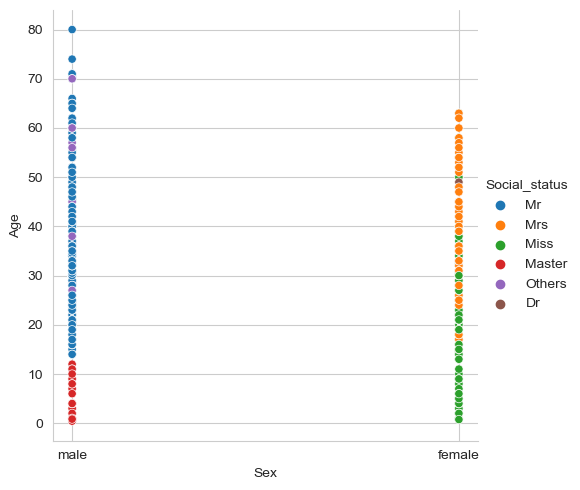

In [37]:
sns.relplot(x='Sex', y='Age', data=train_df, hue="Social_status")

In [38]:
from sklearn.impute import SimpleImputer
test_df[num_cols].isna().sum()
imputer = SimpleImputer(strategy="mean").fit(test_df[num_cols])

In [39]:
test_df[imputer.get_feature_names_out().tolist()] = imputer.transform(test_df[imputer.get_feature_names_out().tolist()])

### Feature Enginneering

### Categorical Variables

In [40]:
train_df[cat_cols]['Embarked'].value_counts()

S          644
C          168
Q           77
Unknown      2
Name: Embarked, dtype: int64

In [41]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
sex_code = {"male": 1, "female": 0}
train_df['Sex_code'] = train_df['Sex'].map(sex_code)

In [43]:
test_df['Sex_code'] = test_df['Sex'].map(sex_code)

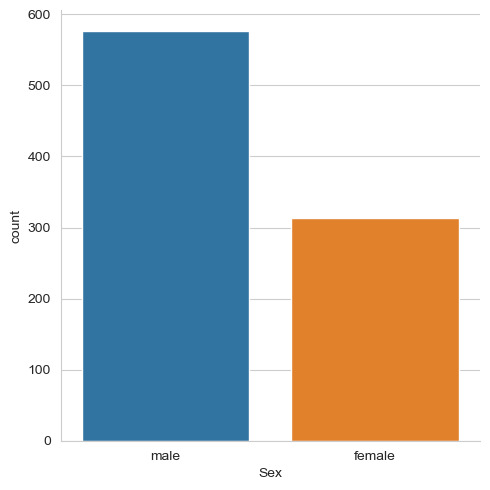

In [44]:
sns.catplot(train_df, x='Sex', kind='count')

In [45]:
train_df['Ticket'].nunique()

681

In [46]:
train_df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [47]:
temp = train_df["Ticket"].value_counts()
train_df['Ticket_counts'] = train_df["Ticket"].apply(lambda x: temp[x])

temp_b =test_df["Ticket"].value_counts()
test_df['Ticket_counts'] = test_df["Ticket"].apply(lambda x: temp_b[x])

In [48]:
train_df.tail(10)

PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare    Cabin Embarked  \
881    male  33.0      0      0            349257   7.8958  Unknown        S   
882  female  22.0      0      0              7552  10.5167  Unknown        S   
883    male  28.0      0      0  C.A./SOTON 34068  10.5000  Unknown        S   
884    male  25.0      0      0   SOTON/OQ 392076   7.0500  Unknown        S   
885  female  39.0      0      5            382652  29.1250  Unknown        Q   
886    male  27.0      0      0            211536  13.0000  Unknown        S   
887  female  19.0      0      0            112053  30.0000      B42        S   
888  female  21.0      1      2        W./C. 6607  23.4500  Unknown        S   
889    male  26.0      0      0            111369  30.0000     C148        C   
890    male  32.0      0      0            370376   7.7500  Unknown        Q   

     Missing_age Social_status  Sex_code  Ticket_counts  
881            0            Mr         1              1  
882            0          Miss         0              1  
883            0            Mr         1              1  
884            0            Mr         1              1  
885            0           Mrs         0              5  
886            0        Others         1              1  
887            0          Miss         0              1  
888            1          Miss         0              2  
889            0            Mr         1              1  
890            0            Mr         1              1

In [49]:
for i in range(0, len(train_df)):
    if train_df['Ticket_counts'][i] < 3:
        train_df["Ticket"][i] = "Others"

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_8600\4013166782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Ticket"][i] = "Others"


In [50]:
for i in range(0, len(test_df)):
    if test_df['Ticket_counts'][i] < 3:
        test_df["Ticket"][i] = "Others"

C:\Users\Ahmad Kazeem\AppData\Local\Temp\ipykernel_8600\3473251056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Ticket"][i] = "Others"


In [51]:
len(train_df[train_df['Ticket']  != "Others"])

156

In [52]:
train_df['Ticket'].value_counts().value_counts()

3      21
4      11
7       3
6       3
5       2
735     1
Name: Ticket, dtype: int64

In [53]:
train_df[cat_cols].nunique()

Name        891
Sex           2
Ticket       41
Cabin       148
Embarked      4
dtype: int64

In [54]:
train_df.iloc[:3]

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch  Ticket     Fare    Cabin Embarked  Missing_age Social_status  \
0      0  Others   7.2500  Unknown        S            0            Mr   
1      0  Others  71.2833      C85        C            0           Mrs   
2      0  Others   7.9250  Unknown        S            0          Miss   

   Sex_code  Ticket_counts  
0         1              1  
1         0              1  
2         0              1

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
categorical_cols  = train_df.select_dtypes("object").columns[~train_df.select_dtypes("object").columns.isin(["Name", "Sex"])]
categorical_cols

Index(['Ticket', 'Cabin', 'Embarked', 'Social_status'], dtype='object')

In [57]:
numerical_cols = train_df.select_dtypes(np.number).columns[~train_df.select_dtypes(np.number).columns.isin(["PassengerId"])]
numerical_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Missing_age',
       'Sex_code', 'Ticket_counts'],
      dtype='object')

In [58]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [59]:
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [61]:
encoded_cols = encoder.get_feature_names_out()
train_df[encoded_cols] = encoder.transform(train_df[categorical_cols])

In [63]:
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler = MinMaxScaler()

In [66]:
scaler.fit(train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

MinMaxScaler()

In [67]:
train_df[scaler.get_feature_names_out().tolist()] = scaler.transform(train_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

In [68]:
test_df[scaler.get_feature_names_out().tolist()] = scaler.transform(test_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',]])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
training_data, validation_data = train_test_split(train_df, train_size=0.75, random_state=40)

In [71]:
train_inputs= encoded_cols.tolist() + ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Missing_age', 'Sex_code'] 

In [80]:
target_inputs = "Survived"

In [76]:
X_train, X_val, X_test  = training_data[train_inputs], validation_data[train_inputs], test_df[train_inputs]

In [94]:
test_data = test_df.merge(gender_df, on="PassengerId")

In [95]:
train_target, val_target, test_target = training_data[target_inputs], validation_data[target_inputs], test_data[target_inputs]

In [81]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression(solver='liblinear')

In [98]:
model.fit(X_train, train_target.values.ravel())

LogisticRegression(solver='liblinear')

In [111]:
train_pred = model.predict(X_train)

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [115]:
accuracy_score(train_pred, train_target.values.ravel())

0.8652694610778443

<Axes: >

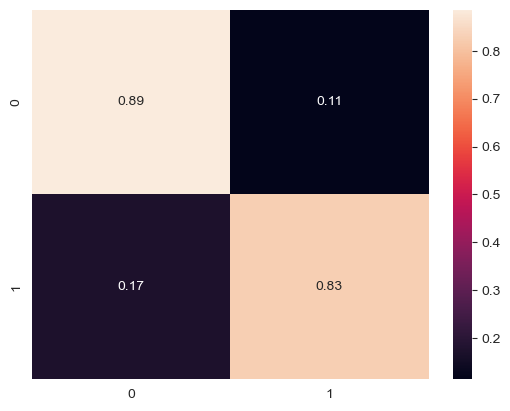

In [121]:
sns.heatmap(confusion_matrix(train_pred, train_target.values.ravel(), normalize='true'), annot=True)

In [99]:
model.score(X_train, train_target.values.ravel())

0.8652694610778443

In [100]:
model.score(X_val, val_target.values.ravel())

0.8475336322869955

In [101]:
model.score(X_test, test_target.values.ravel())

0.9665071770334929

In [148]:
model_weight_ = pd.DataFrame({"names": train_inputs, "coef": model.coef_.tolist()[0]})

<Figure size 6000x5700 with 0 Axes>

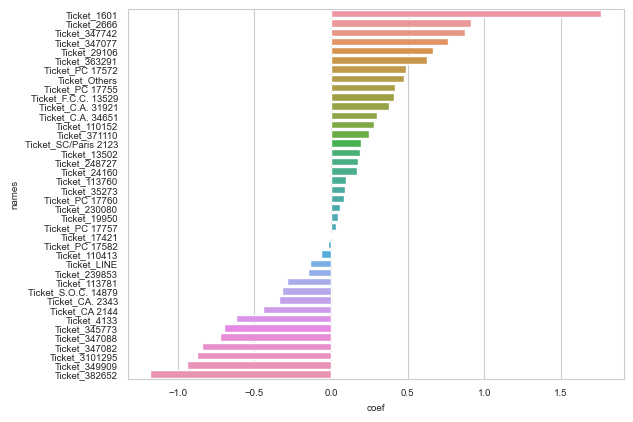

<Figure size 6000x5700 with 0 Axes>

In [164]:
sns.barplot(x='coef', y='names', data=model_weight_[0:40].sort_values("coef", ascending=False))
plt.figure(figsize=(20, 19), dpi=300)

<Figure size 6000x5700 with 0 Axes>

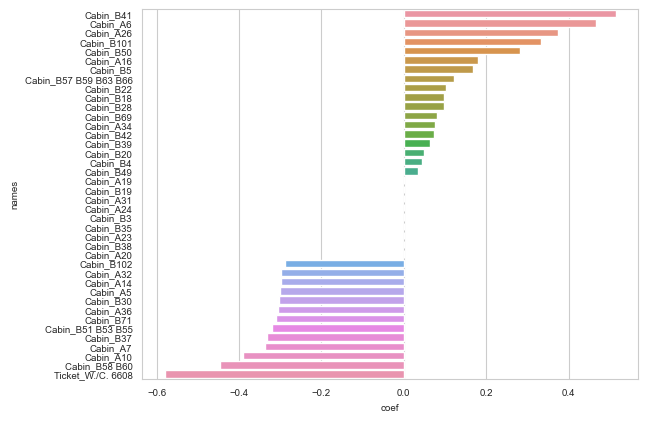

<Figure size 6000x5700 with 0 Axes>

In [166]:
sns.barplot(x='coef', y='names', data=model_weight_[40:80].sort_values("coef", ascending=False))
plt.figure(figsize=(20, 19), dpi=300)

In [170]:
plt.figure(figsize=(20, 20), dpi=500)
plt.savefig('slopes.png', dpi=500)
sns.barplot(x='coef', y='names', data=model_weight_.sort_values("coef", ascending=False))


<Axes: xlabel='coef', ylabel='names'>

In [ ]:
# Wow even the missing_age and the social_status has a great importance or significance in the prediction of the data

In [201]:
plt.figure(figsize=(20, 20), dpi=500)
plt.savefig('slopes.png', dpi=500)

sns.barplot(x='coef', y='names', data=model_weight_.apply(lambda x: x[model_weight_['coef'] > 0]).sort_values("coef", ascending=False))


<Axes: xlabel='coef', ylabel='names'>

In [202]:
plt.figure(figsize=(20, 20), dpi=500)
plt.savefig('slopes.png', dpi=500)

sns.barplot(x='coef', y='names', data=model_weight_.apply(lambda x: x[model_weight_['coef'] <= 0]).sort_values("coef", ascending=False))


<Axes: xlabel='coef', ylabel='names'>

In [172]:
train_df[numerical_cols]

Survived  Pclass       Age  SibSp     Parch      Fare  Missing_age  \
0           0     1.0  0.271174  0.125  0.000000  0.014151            0   
1           1     0.0  0.472229  0.125  0.000000  0.139136            0   
2           1     1.0  0.321438  0.000  0.000000  0.015469            0   
3           1     0.0  0.434531  0.125  0.000000  0.103644            0   
4           0     1.0  0.434531  0.000  0.000000  0.015713            0   
..        ...     ...       ...    ...       ...       ...          ...   
886         0     0.5  0.334004  0.000  0.000000  0.025374            0   
887         1     0.0  0.233476  0.000  0.000000  0.058556            0   
888         0     1.0  0.258608  0.125  0.333333  0.045771            1   
889         1     0.0  0.321438  0.000  0.000000  0.058556            0   
890         0     1.0  0.396833  0.000  0.000000  0.015127            0   

     Sex_code  Ticket_counts  
0           1              1  
1           0              1  
2           0              1  
3           0              2  
4           1              1  
..        ...            ...  
886         1              1  
887         0              1  
888         0              2  
889         1              1  
890         1              1  

[891 rows x 9 columns]

### Saving Model

In [225]:
pd.DataFrame(train_inputs, columns=["Train_input"]).to_parquet("train_inputs.parquet")
pd.DataFrame(training_data).to_parquet("training_data.parquet")
pd.DataFrame(validation_data).to_parquet("validation_data.parquet")
pd.DataFrame(test_data).to_parquet("test_data.parquet")

In [227]:
pd.DataFrame(X_train).to_parquet("X_train.parquet")
pd.DataFrame(X_val).to_parquet("X_val.parquet")
pd.DataFrame(X_test).to_parquet("X_test.parquet")


In [229]:
pd.DataFrame(train_target).to_parquet("train_target.parquet")
pd.DataFrame(val_target).to_parquet("val_target.parquet")
pd.DataFrame(test_target).to_parquet("test_target.parquet")